# Installation:

**1) Install [Anaconda](https://www.anaconda.com/download/)**!

And (optional) an IDE of your choice (recommended: [PyCharm](https://www.jetbrains.com/pycharm/download/#section=windows) Community Edition)

**2) Clone or download the `pyramid` package!**

<img src="images/pyramid-gitlab.png">

Can be found [here](https://iffgit.fz-juelich.de/caron/pyramid), if you have access (ask me!).

**3) Clone or download the `jutil` package!**

<img src="images/jutil-gitlab.png">

Can be found [here](https://iffgit.fz-juelich.de/unger/jutil), if you have access (ask me or Jörn!).

**4) Create an environment for pyramid to work in, using the `environment.yml` file in the `pyramid` package by using:**

`conda env create`

in a terminal in the folder containing `pyramid`. Tested on Windows, but should also work on Mac/Linux.

<img src="images/environment.png">

**5) Activate environment by using:**

Windows:     `activate pyramid`

Mac/Linux:   `source activate pyramid`

Test if the correct environment is active!

<img src="images/activate.png">

Deactivate by using:

Windows:     `deactivate`

Mac/Linux:   `source deactivate`

**6) Install `jutil` into environment by using **

`python setup.py install`

in the folder containing `jutil`.

Make sure to use the correct python distribution (you can check the currently used one with `which python`). If this does not show the one in your newly created environment, you have to use the absolute path to the correct executable, e.g.:

`C:\Users\Jan\Anaconda3\envs\pyramid\python setup.py install`

**7) EITHER install `pyramid` OR create a PyCharm project containing the `pyramid` package!**

The former is simpler, but static.

The latter makes it easier to update, but requires you to add it to your `PYTHONPATH`, either manually (depends on OS) or through PyCharm directly:

<img src="images/addsource.png">

# Imports:

In [1]:
%matplotlib inline

Matplotlib magic, which causes plots to be part of the notebook (and not to cause pop ups).

In [2]:
import matplotlib.pyplot as plt
import numpy as np

Standard imports for plotting and array handling.

In [3]:
import pyramid as pr

Import of the `pyramid` package.

In [4]:
import hyperspy.api as hs

(Optional) import of `hyperspy` (which is implicitly imported by pyramid! This line is used so that you can use it too!).

# `PhaseMap` objects:

The `PhaseMap` class is the main container for phase image information! It has four main properties:

<img src='images/phasemap-attributes.png'>

You can access the class by:

In [5]:
pr.PhaseMap

pyramid.phasemap.PhaseMap

You can either create it from scratch from an array for the `phase` (optionally add more arrays for `mask` and `confidence`):

In [6]:
pr.PhaseMap(a=1., phase=np.random.rand(3, 3))

<class 'pyramid.phasemap.PhaseMap'>(a=1.0, phase=array([[ 0.82986605,  0.98119003,  0.86229068],
       [ 0.8712855 ,  0.57128489,  0.80138129],
       [ 0.3215622 ,  0.94970268,  0.11142938]], dtype=float32), mask=array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]], dtype=bool), confidence=array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]], dtype=float32))

Or you can use a function to load your `PhaseMap` from files:

In [7]:
pr.load_phasemap(filename='files/phase.unf',
                 mask='files/mask.png',
                 confidence='files/confidence.png')

<class 'pyramid.phasemap.PhaseMap'>(a=2.3397676944732666, phase=array([[ 2.25994539,  2.12877226,  2.00473404, ..., -0.82605231,
        -0.82698369, -0.83442903],
       [ 2.18183088,  2.10657787,  2.02745509, ..., -0.84845436,
        -0.87115979, -0.92549813],
       [ 2.10183334,  2.08600307,  2.08259559, ..., -0.93619359,
        -0.95021701, -1.00094056],
       ..., 
       [-3.91421628, -4.01777458, -4.05607224, ..., -0.62674415,
        -0.54183698, -0.61593223],
       [-3.92380714, -4.02503061, -4.08243799, ..., -0.7407397 ,
        -0.67144012, -0.68445015],
       [-3.96454954, -4.08466053, -4.18111467, ..., -0.80714726,
        -0.77447641, -0.76257765]], dtype=float32), mask=array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [

The package tries to load the grid spacing `a` from the phase file determined by `filename` and defaults to `1` [nm], if it can not be determined. You can overwrite the grid spacing by adding `a` as a keyword argument to the loading function.

`mask` and `confidence` are optional parameters and can be skipped (like in the "by-hand" example above).

`pyramid` uses mainly `hyperspy` functionality to load files (and `PIL` for images of all kinds) and thus has the same flexibility concerning different formats.

After constructing or loading a `PhaseMap`, it can be saved to a file:

In [8]:
phasemap = pr.load_phasemap(filename='files/phase.unf', mask='files/mask.png', confidence='files/confidence.png')
phasemap.save('phasemap.hdf5', overwrite=True)

# Plot `PhaseMap`:

First, load or create a `PhaseMap`:

In [9]:
phasemap = pr.load_phasemap(filename='files/phase.unf', mask='files/mask.png', confidence='files/confidence.png')

To plot the `PhaseMap` (including possibly the mask and the confidence), use:

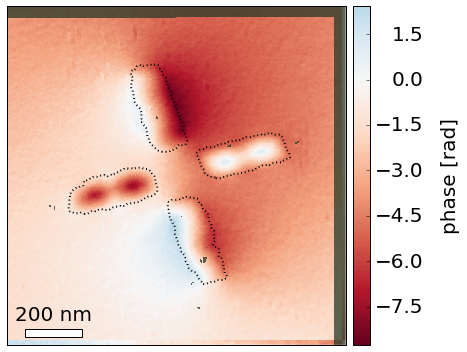

In [10]:
phasemap.plot_phase()

You can use the following (optional) parameters to change the plot to your liking:

<img src='images/plot-phase-params.png'>

Furthermore, you can plot the holographic contour map by using:

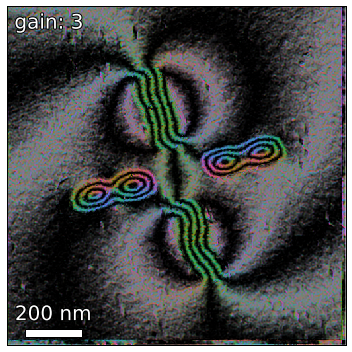

In [11]:
phasemap.plot_holo()

You can use the following (optional) parameters to change the plot to your liking:

<img src='images/plot-holo-params.png'>

# `VectorData` objects:

The `VectorData` class is a container for 3D vector fields. It has two 

<img src='images/vectordata-attributes.png'>

The class can be accessed by:

In [12]:
pr.VectorData

pyramid.fielddata.VectorData

You can either create it from scratch from an array for the `field`:

In [13]:
pr.VectorData(a=1., field=np.random.rand(3, 2, 2, 2))

<class 'pyramid.fielddata.VectorData'>(a=1.0, field=array([[[[ 0.64774582,  0.02904035],
         [ 0.10343234,  0.18500652]],

        [[ 0.67038596,  0.41825836],
         [ 0.9318392 ,  0.25028341]]],


       [[[ 0.77349058,  0.23874362],
         [ 0.32646645,  0.28253053]],

        [[ 0.16217382,  0.64601006],
         [ 0.84621843,  0.13836958]]],


       [[[ 0.57555382,  0.8270345 ],
         [ 0.81910327,  0.50360887]],

        [[ 0.12383989,  0.51850919],
         [ 0.15333963,  0.13264388]]]]))

Or you can use a function to load your `VectorData` from file:

In [14]:
pr.load_vectordata(filename='files/magdata.hdf5')

<class 'pyramid.fielddata.VectorData'>(a=2.3397676944732666, field=array([[[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]]],


       [[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]]],


       [[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]]]]))

The package tries to load the grid spacing `a` from the vector field file determined by `filename` and defaults to `1` [nm], if it can not be determined. You can overwrite the grid spacing by adding `a` as a keyword argument to the loading function.

After constructing or loading a `VectorData`, it can be saved to a file:

In [15]:
magdata = pr.load_vectordata(filename='files/magdata.hdf5')
magdata.save('files/magdata.hdf5', overwrite=True)

Furthermore, the `pr.magcreator` subpackage contains a lot of functions to create custom vector fields. It has a module `examples` with a lot of interesting shapes and geometries.

A vortex disc with a smooth core can e.g. be created by using (see next section for the plot):

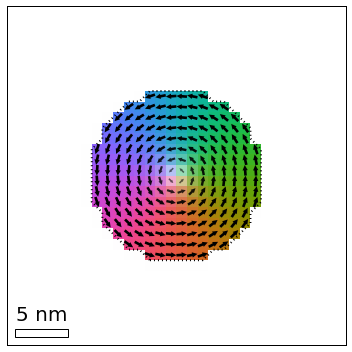

In [16]:
magdata = pr.magcreator.examples.smooth_vortex_disc()
magdata.plot_quiver_field()

Or a Halbach disc:

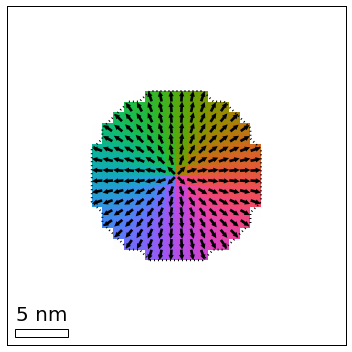

In [17]:
magdata = pr.magcreator.examples.source_disc()
magdata.plot_quiver_field()

Each example has a lot of attributes which can be used to adapt them to the users needs.

For more fine control, the following functions can be used:

In [18]:
pr.magcreator.create_mag_dist_homog

<function pyramid.magcreator.magcreator.create_mag_dist_homog>

In [19]:
pr.magcreator.create_mag_dist_vortex

<function pyramid.magcreator.magcreator.create_mag_dist_vortex>

In [20]:
pr.magcreator.create_mag_dist_smooth_vortex

<function pyramid.magcreator.magcreator.create_mag_dist_smooth_vortex>

In [21]:
pr.magcreator.create_mag_dist_source

<function pyramid.magcreator.magcreator.create_mag_dist_source>

The first parameter for these functions is always a boolean array `mag_shape`, which determines the magnetised volume in 3D. See the docstrings for more information.

# Plot VectorData objects:

There are several methods to plot slices of a 3D magnetisation distribution, e.g. the color coded field can be plotted with:

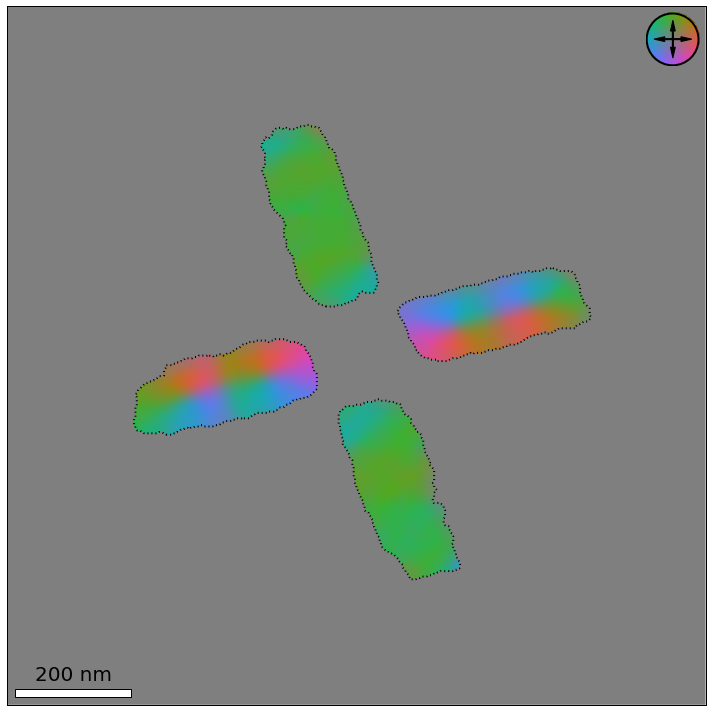

In [22]:
magdata = pr.load_vectordata(filename='files/magdata.hdf5')
magdata.plot_field(figsize=(10, 10), colorwheel=True)

You can use the following (optional) parameters to change the plot to your liking (in 3D, take care that you plot the correct slice along the correct axis!):

<img src='images/plot-field-params.png'>

Another plot is the quiver plot which plots arrows, whose density can be controlled with the parameter `ar_dens`:

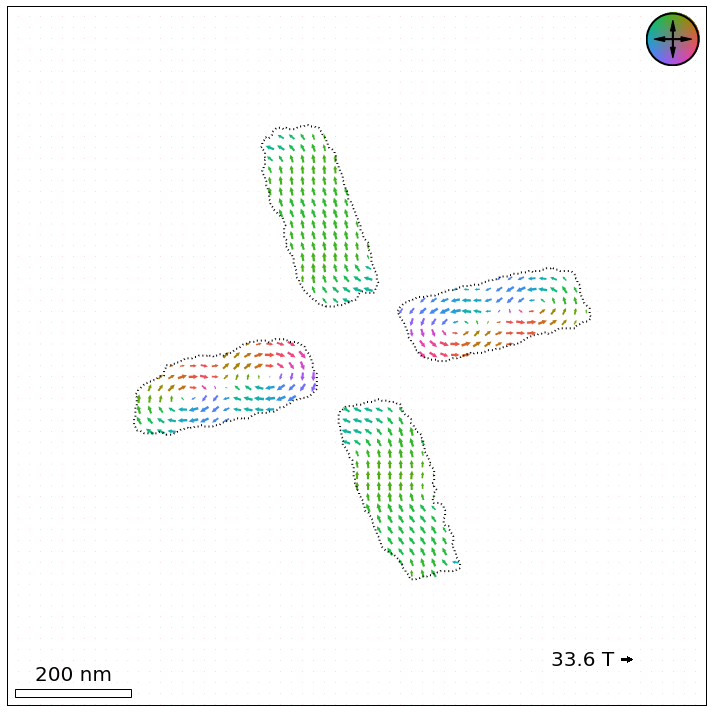

In [23]:
magdata.plot_quiver(ar_dens=8, figsize=(10, 10), b_0=1, colorwheel=True)

You can use the following (optional) parameters to change the plot to your liking:

<img src='images/plot-quiver-params.png'>

By setting the parameter `coloring='amplitude'`, the amplitude of the arrows can be encoded:

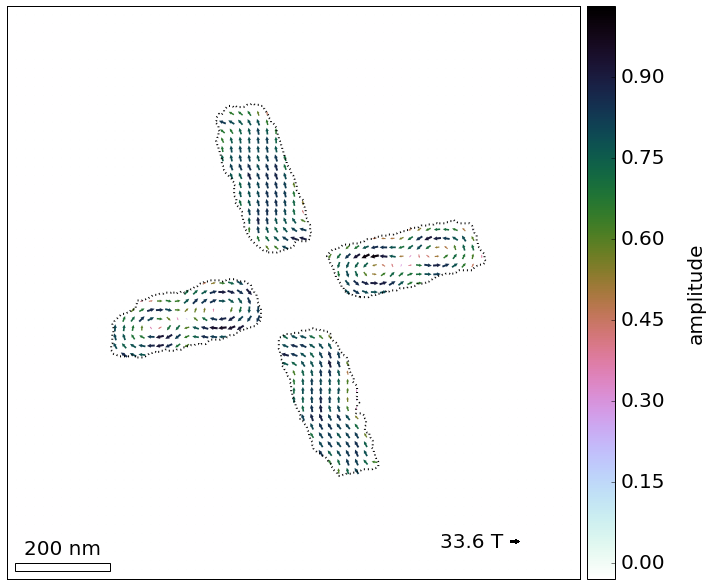

In [24]:
magdata.plot_quiver(ar_dens=8, figsize=(10, 10), b_0=1, coloring='amplitude')

It is recommended to combine field and quiver plots by using:

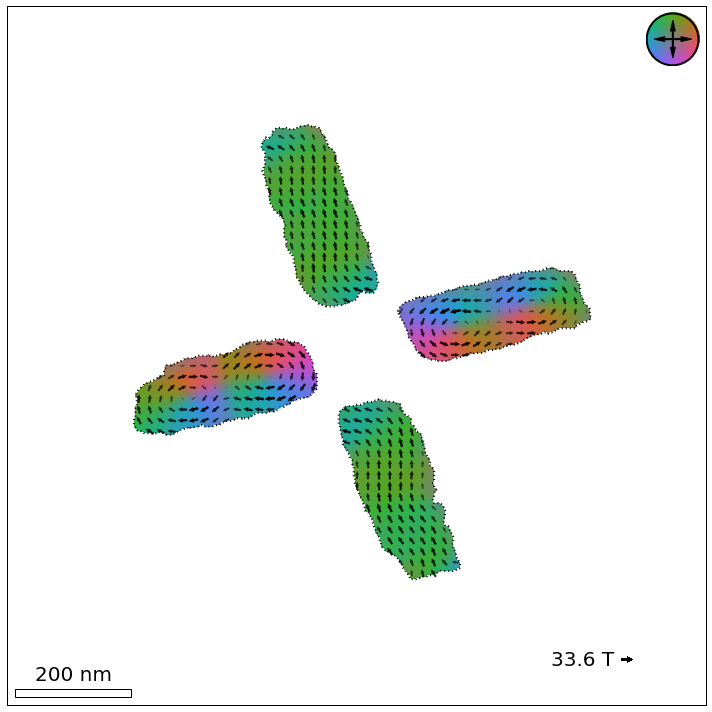

In [25]:
magdata.plot_quiver_field(ar_dens=8, figsize=(10, 10), b_0=1, colorwheel=True)

For 2D reconstructions, sometimes a thickness correction has to be done. This is achieved by using the `b_0` parameter:

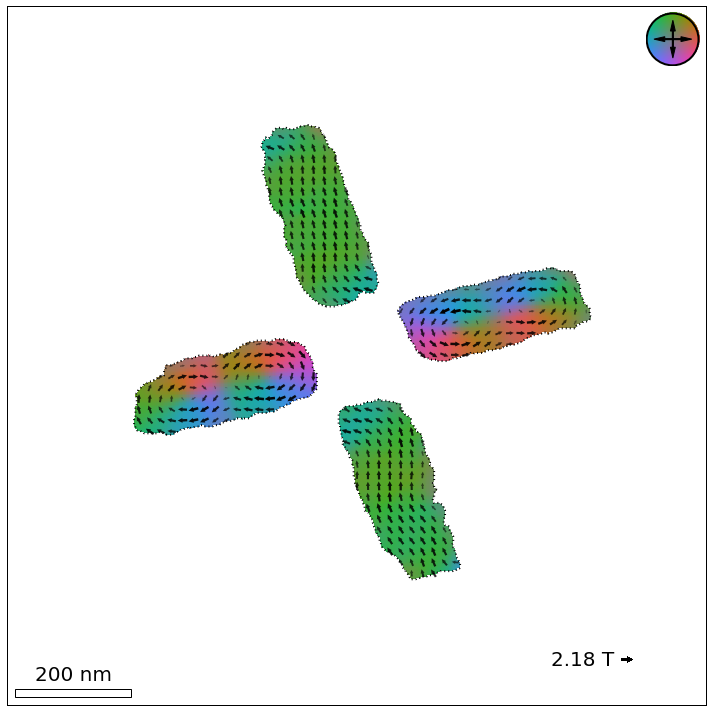

In [26]:
t = 36  # nm
b_0 = magdata.a / t
magdata.plot_quiver_field(ar_dens=8, figsize=(10, 10), b_0=b_0, colorwheel=True)

3D plots are also possible, but are not discussed here, due to problems with displaying them in a notebook!

# Forward Model:

A fast way to apply the forward model to a given magnetisation distribution is the convenience function:

(<matplotlib.axes._subplots.AxesSubplot at 0x16524128>,
 <matplotlib.axes._subplots.AxesSubplot at 0x161e84e0>)

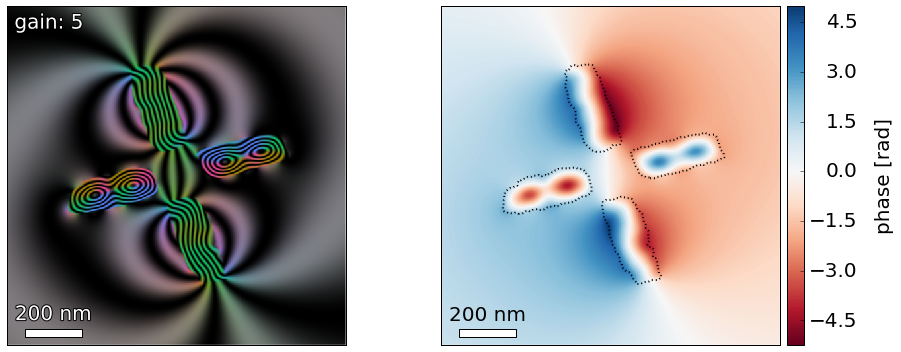

In [27]:
phasemap = pr.utils.pm(magdata)
phasemap.plot_combined()

The function accepts optional parameters:

<img src='images/pm-params.png'>

# Reconstruction:

For a fast reconstruction of the projected in-plane moments from a single `PhaseMap`, you can use a convenient one-liner:

A Jupyter Widget

offset: -2.44906859942
ramp: (-0.0019105158773786001, 0.0012208734707822777)


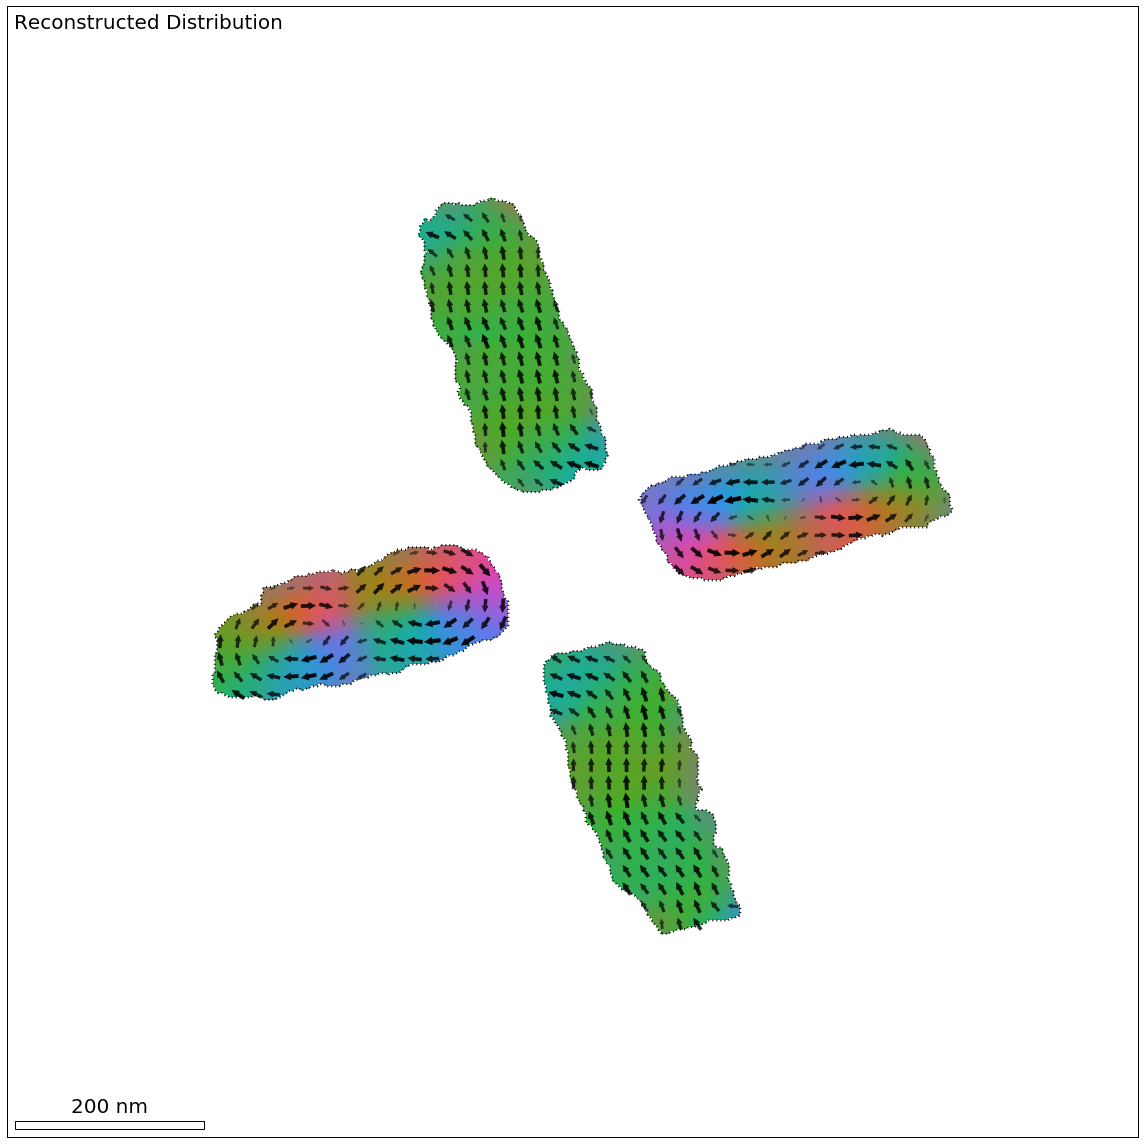

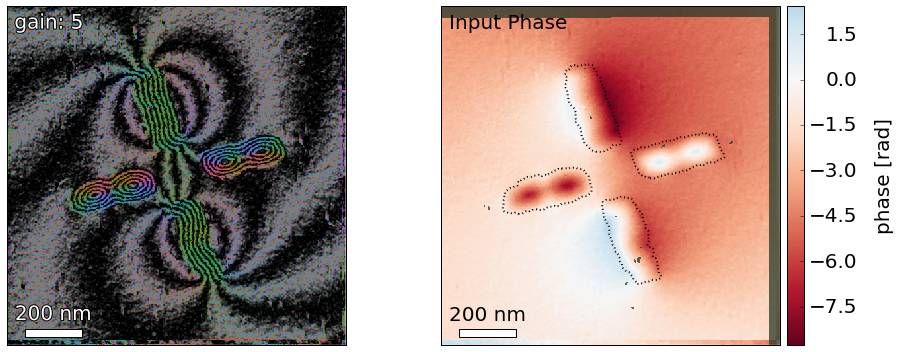

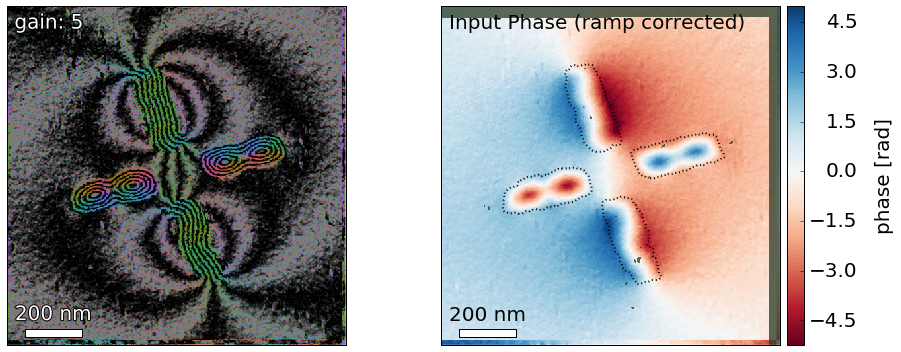

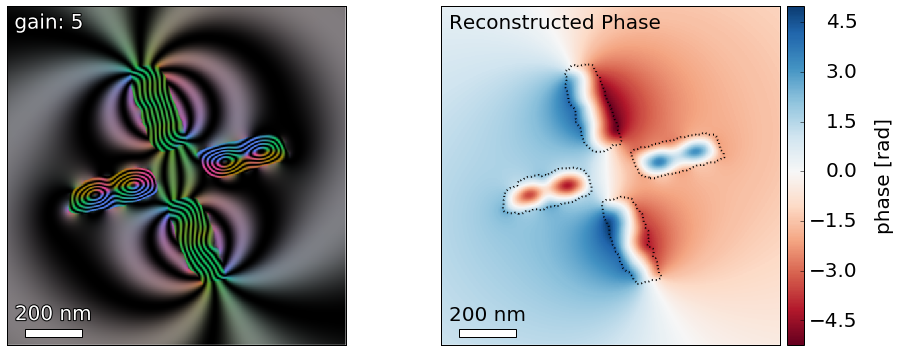

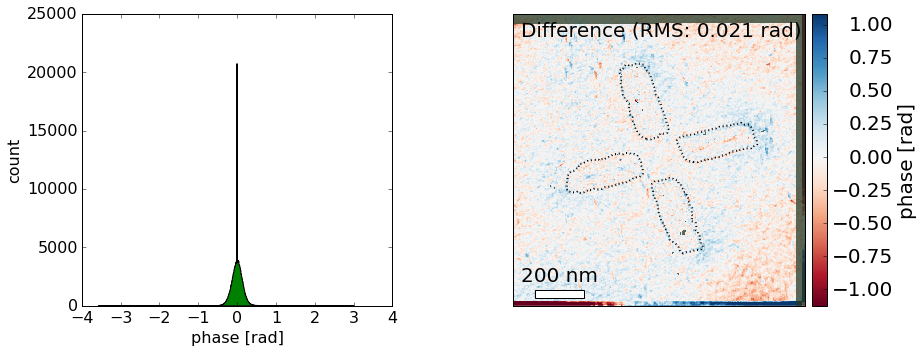

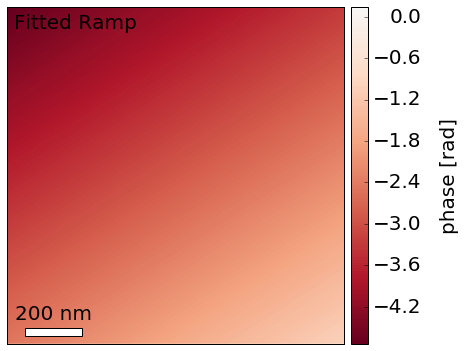

In [28]:
phasemap = pr.load_phasemap(filename='files/phase.unf', mask='files/mask.png', confidence='files/confidence.png')
magdata_rec, cost = pr.utils.reconstruction_2d_from_phasemap(phasemap, lam=0.01, plot_results=True)

These are the parameters that can be changed to influence the reconstruction:

<img src='images/rec2d-params.png'>

The one-liner does a lot of stuff under the hood, which can also be done manually to have granular control over the reconstruction process.

First, a `DataSet` instance has to be constructed, which holds one (like in this exampl) or more `PhaseMap` instances and the according `Projector` instances that determine the projection direction (a simple `z`-projection in this case).

The `DataSet` needs the grid spacing, the dimension of your 3D distribution and a scaling factor for the saturation induction (just use `b_0=1` if no further scaling is needed):

In [29]:
dim = (1,) + phasemap.dim_uv
data = pr.DataSet(phasemap.a, dim, b_0=1)

Now the phase images and projectors have to be added to the `DataSet`. In this example, only one pair is added and the projector (a simple `z`-projection) is created on the fly (it needs the dimensions of the 3D magnetisation volume):

In [30]:
data.append(phasemap, pr.SimpleProjector(dim))

If the mask, which determines the position of the magnetised volume in 3D space is known, it can be set by using (the mask is `True` everywhere in this example):

In [31]:
mask = np.ones(dim)
data.mask = mask

If the mask is not known, it can be calculated. If the `DataSet` contains only one `PhaseMap`, the 2D mask (if available) is used. For tilt series, a simple discrete back-projection algorithm is used. The command is:

In [32]:
data.set_3d_mask()

A forward model is constructed which uses the `DataSet` and a parameter `ramp_order` as input:

In [33]:
fwd_model = pr.ForwardModel(data, ramp_order=1)

The `ramp_order` determines the additional fit of phase polynoms:

* `ramp_order` = None : No additional polynom is fitted.
* `ramp_order` = 0    : A global phase offset is fitted.
* `ramp_order` = 1    : An offset and ramps are  fitted.

Next, a `Regularisator` has to be constructed, which constrains the solution of the reconstruction:

In [34]:
reg = pr.FirstOrderRegularisator(data.mask, lam=0.01, add_params=fwd_model.ramp.n)

The `FirstOrderRegularisator` constrains the smoothness of the solution (Thikonov 1. order).
It uses the 3D `mask`, a regularisation parameter `lam` and `add_params`, which has to be set to the number of degrees of freedom of the ramp via `fwd_model.ramp.n`, as input.

`ForwardModel` and `Regularisator` are then combined in a `Costfunction`:

In [35]:
cost = pr.Costfunction(fwd_model, reg)

This `Costfunction` is then minimised using the `optimize_linear` function in the `reconstruction` module (all of this is done implicitely by the convenience function `pr.utils.reconstruction_2d_from_phasemap`):

A Jupyter Widget

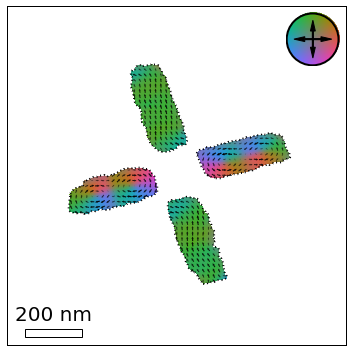

In [36]:
magdata_rec = pr.reconstruction.optimize_linear(cost, max_iter=100, verbose=True)
magdata_rec.plot_quiver_field(ar_dens=8, colorwheel=True)

To find a good estimate for $\lambda$, an L-Curve analysis should be done. A dedicated class implementing this feature is currently under development!

3D reconstructions are not shown here, as they take a long time and plotting in a notebook is not very intuitive at the moment!

After reconstruction, several diagnostic measures can be calculated. They can be found in the `pr.diagnostics` module and are not further discussed here!